# HulC for shape constrained regression
## Univariate Monotone Regression 
Suppose $(X_i, Y_i)\in\mathbb{R}\times\mathbb{R}, 1\le i\le n$  are independent observations from the non-parametric model
\begin{equation*}
Y_i = f_0(X_i) + \xi_i,\quad\mathbb{E}[\xi_i|X_i] = 0.
\end{equation*}
In the traditional non-parametric model, there are no functional form restrictions on $f_0$ except for some smoothness assumptions. In the monotone regression problem, we do not impose smoothness assumptions but require that $f_0$ be a non-decreasing function. Two important aspects to note about the model above: (1) we do not require the errors $\xi_i$ to be homoscedastic or independent of the covariates, and (2) we do not require $X_i$'s to be on an equi-spaced grid. They can either be random or fixed. 
### Problem
We consider the problem of constructing confidence interval for $f_0(x^*)$ where $x^*$ is a point in the support of the distribution of the $X_i$'s.

## LSE and pointwise asymptotics
Before we consider the application of HulC, we need to consider an estimator and its median bias properties. A natural estimator for $f_0$ is obtained via least squares
\begin{equation*}
\widehat{f} := \underset{f: \text{non-decreasing}}{\text{argmin}}\,\frac{1}{n}\sum_{i=1}^n (Y_i - f(X_i))^2.
\end{equation*}
Note that this is an infinite dimensional convex optimization problem. Because the objective function depends only on $f(X_i), 1\le i\le n$, it can be converted into an $n$-dimensional constrained quadratic programming problem. There is an efficient algorithm, called PAVA, to solve this problem and is implemented via the R function `isoreg`. In contrast to many of the commonly used non-parametric estimators, $\widehat{f}$ is fully automated and does not involve any tuning parameters.

### Pointwise asymptotics
Wright (1981, AoS, The asymptotic behavior of monotone regression estimates) proved the pointwise asymptotic distribution of $\widehat{f}(\cdot)$. The simplest case of this is when $f_0$ is continuously differentiable at the point $x^*$. If $f_0$ is continuously differentiable at $x^*$ and $f_0'(x^*) > 0$, then
\begin{equation*}
n^{1/3}(\widehat{f}(x^*) - f_0(x^*)) \overset{d}{\to} \left(\frac{4\sigma^2(x^*)f_0'(x^*)}{h(x^*)}\right)^{1/3}\mathbb{C},
\end{equation*}
where $\sigma^2(x) = \mbox{Var}(Y_i|X_i = x),$ $h(\cdot)$ is the density of $X_i$'s, and $\mathbb{C}$ is a random variable with the Chernoff distribution. $\mathbb{C}$ is a symmetric (about $0$) random variable that is obtained as the minimizer of a drifted two-sided Brownian motion starting at $0$. It is important for this result that $f_0(x^*) > 0$. Note that $f_0$ being non-decreasing, $f_0'(x^*) \ge 0$. If $X_i$'s are fixed, then $h(\cdot)$ should be thought of the derivative of the limiting empirical distribution of the covariates.
 
The more general result allows for non-differentiable of $f_0$ at $x^*$ as well as higher order smoothness. Suppose $f_0$ at $x^*$ satisfies
\begin{equation*}
\frac{|f_0(x) - f_0(x^*)|}{|x - x^*|^{\beta}} = A(1 + o(1))\quad\mbox{as}\quad x\to x^*,
\label{eq:smoothness}\tag{1}
\end{equation*}
for some $1/2 \le \beta < \infty$, then
\begin{equation*}
n^{\beta/(2\beta + 1)}(\widehat{f}(x^*) - f_0(x^*)) \overset{d}{\to} \left(\frac{\sigma^2(x^*)A^{1/\beta}}{h(x^*)(\beta + 1)^{1/\beta}}\right)^{\beta/(2\beta + 1)}\mathbb{C}_{\beta},
\end{equation*}
where $\mathbb{C}_{\beta}$ is the slope at zero of the greatest convex minorant of $W(t) + |t|^{\beta + 1}$, where $W(\cdot)$ is the two-sided Wiener-Levy process with variance one per unit time. The result in Wright (1981, AoS) does not require $\beta \ge 1/2$, but we do because we state the result for both random and fixed design. See Section 3 of Wright (1981, AoS) for details.

If $\beta$ is an integer, then the smoothness condition \eqref{eq:smoothness} is equivalent to
\begin{equation*}
f_0'(x^*) = \cdots = f_0^{(\beta - 1)}(x^*) = 0,\quad\mbox{and}\quad \frac{f_0^{(\beta)}(x^*)}{\beta!} = A.
\end{equation*}
This shows that the condition \eqref{eq:smoothness} is more of a local flatness condition rather than a local smoothness condition. Furthermore, the result above shows that the monotone LSE attains adaptive local rate of convergence as the local flatness of the function increases. Note that for $1/2 \le \beta < \infty$, the limiting distribution is a product of two quantities: a scalar non-random factor depending only on $f_0$ and $x^*$, and a random variable $\mathbb{C}_{\beta}$ independent of $f_0$ and $x^*$. 

Both the pointwise limiting distributions results require additional regularity conditions including a Lindeberg type condition. We refer the reader to Theorem 1 of Wright (1981, AoS) for more details. Observe that both the results stated above do not cover the case where $f_0$ is flat at $x^*$ (i.e., $\beta = \infty$ in \eqref{eq:smoothness}). If $f_0$ has a flat piece around $x^*$, then $n^{1/2}(\widehat{f}(x^*) - f_0(x^*))$ has a non-degenerate limiting distribution. The limiting distribution here is complicated and does not have the multiplicative form that holds for $\beta < \infty$. 

**Some Comments.**
- The rate of convergence and the limiting distribution depends on the local flatness of $f_0$.
- The limiting distribution depends on additional unknown nuisance components such as the design density and heteroscedasticity. In general, estimation of these nuisance components involves tuning parameters, while estimation of $f_0(x^*)$ does not require any.
- Traditional methods of inference such as Wald's, bootstrap, and subsampling fall short in various ways. Firstly, Wald interval is hard to implement here because it involve estimation of multiple nuisance components and further "good" estimation of these nuisance components require some smoothness conditions on them which is not required for estimation of $f_0(x^*)$. Secondly, bootstrap is known to be inconsistent with the LSE (see Guntuboyina and Sen (2018, Statistical Science)), but bootstrap with smoothed LSE is known to be consistent. However, smoothing the LSE involves tuning parameters. Finally, subsampling usually requires the knowledge of the rate of convergence of the estimator which is not available here because $\beta$ is unknown.

All the comments above also apply to other shape constrained models. For example, for convex regression model where $f_0$ is constrained to be convex. They also apply to current status models. Further, they also apply to multivariate monotone regression model with the LSE replaced by the block min-max estimator; see Han and Zhang (2020, AoS, Limit distribution theory for block estimators in multiple isotonic regression) for details. Recently, Deng, Han, and Zhang (2020, AoS, Confidence intervals for multiple isotonic regression and other monotone models) have derived an asymptotically "pivotal." This theory is currently only available for errors independent of covariates and the covariates, if random, are uniformly distribution. Further, the pivotal limiting distribution still depends on the unknown variance of the errors. 

## Median bias of the LSE
Let us now consider the median bias of the LSE. In the simplest case where $f_0'(x^*) > 0$, then
\begin{equation*}
\mathbb{P}\left(n^{1/3}(\widehat{f}(x^*) - f_0(x^*)) \le 0\right) \to \mathbb{P}\left(\left(\frac{4\sigma^2(x^*)f_0'(x^*)}{h(x^*)}\right)^{1/3}\mathbb{C} \le 0\right) = \mathbb{P}(\mathbb{C} \le 0) = \frac{1}{2}.
\end{equation*}
Therefore, $\widehat{f}(x^*)$ as an estimator of $f_0(x^*)$ is asymptotically median unbiased. In the complicated case where \eqref{eq:smoothness} is satisfied, the LSE satisfies
\begin{equation*}
\mathbb{P}\left(n^{\beta/(2\beta + 1)}(\widehat{f}(x^*) - f_0(x^*)) \le 0\right) \to \mathbb{P}(\mathbb{C}_{\beta} \le 0).
\end{equation*}
The distribution of $\mathbb{C}_{\beta}$ is not well-understood and it is not known if $\mathbb{P}(\mathbb{C}_{\beta} \le 0) = 1/2$. The asymptotic median bias of $\widehat{f}(x^*)$ under \eqref{eq:smoothness} is given by
\begin{equation*}
\mbox{Med-bias}_{f_0(x^*)}(\widehat{f}(x^*)) \to \left|\frac{1}{2} - \mathbb{P}(\mathbb{C}_{\beta} \le 0)\right|.
\label{eq:asymp-med-bias}\tag{2}
\end{equation*}
To get an understanding of the right hand side, we will generate 1000 times data of size $10^6$ from the model
\begin{equation}
Y_i = \mbox{sign}(X_i)|X_i|^{\beta} + \xi_i,
\end{equation}
where $\xi_i\sim N(0, 1)$ and $X_i\sim \mbox{Unif}[-1, 1]$. Note that the function $f_0(x) = \mbox{sign}(x)|x|^{\beta}$ is increasing and $f_0$ satisfies \eqref{eq:smoothness} at $x^* = 0$. Hence the right hand side of \eqref{eq:asymp-med-bias} by considering the proportion among 1000 replication of when $\widehat{f}(x^*) \le 0$. The following code estimates the right hand side of \eqref{eq:asymp-med-bias} for $\beta$ ranging from $1/2$ to $50$.

In [1]:
### The following is time taking.
beta_seq <- seq(1/2, 50, length = 200)
nrep <- 1000
nsamp <- 1e06
ISO_mat <- matrix(0, ncol = length(beta_seq), nrow = nrep)
# for(beta_idx in 1:length(beta_seq)){
#     beta <- beta_seq[beta_idx]
#     foo <- function(x){
#         sign(x)*abs(x)^beta
#     }
#     for(idx in 1:nrep){
#         x_seq <- seq(-1, 1, length = nsamp)
#         y_seq <- foo(x_seq) + rnorm(nsamp)
#         ## computing fhat
#         tmp <- isoreg(x_seq, y_seq)
#         ## computing fhat(0)
#         ISO_mat[idx, beta_idx] <- approxfun(sort(tmp$x), tmp$yf, method="constant", rule = 2)(0)
#     }    
# }
# print("computing ISO_mat is done!!")
# ## Computing the median bias
# median_bias <- abs(colMeans(sign(ISO_mat))/2)

The output (`median_bias`) shows that $|1/2 - \mathbb{P}(\mathbb{C}_{\beta} \le 0)|$ is close to zero for $\beta\in[1/2, 50]$. The maximum in the estimated median bias is $0.05$. This means that HulC can be applied with $\Delta = 0$ to construct a confidence interval for $f_0(x^*)$ for any $\beta\in[1/2, \infty)$. Hence, for a non-decreasing function without any flat pieces HulC with $\Delta = 0$ yields an asymptotically valid confidence interval without having to estimate the heteroscedasticity or design density or the derivatives of $f_0$. The median bias for $\beta = \infty$ would depend very crucially on $f_0$ and $x^*$ and will be discussed later.

## HulC for functions without flat pieces
In the following, we first provide simulation experiments to show the performance of HulC for pointwise inference for $f_0$ that do not include any flat pieces. Consider $(X_i, Y_i), 1\le i\le n$ from the model
\begin{equation*}
Y_i = \exp(2X_i) + \xi_i\quad\mbox{and}\quad X_i\sim\mbox{Unif}[0, 1],\quad\xi_i|X_i \sim N(0, 1).
\end{equation*}
Here $f_0(x) = \exp(2x)$ and $f_0'(x) = 2e^{2x} > 0$ for all $x\in[0, 1]$. This example is considered in Section 4.2.1 of Deng, Han, and Zhang (2020, AoS). In the following, we show the coverage as well as width properties of HulC.

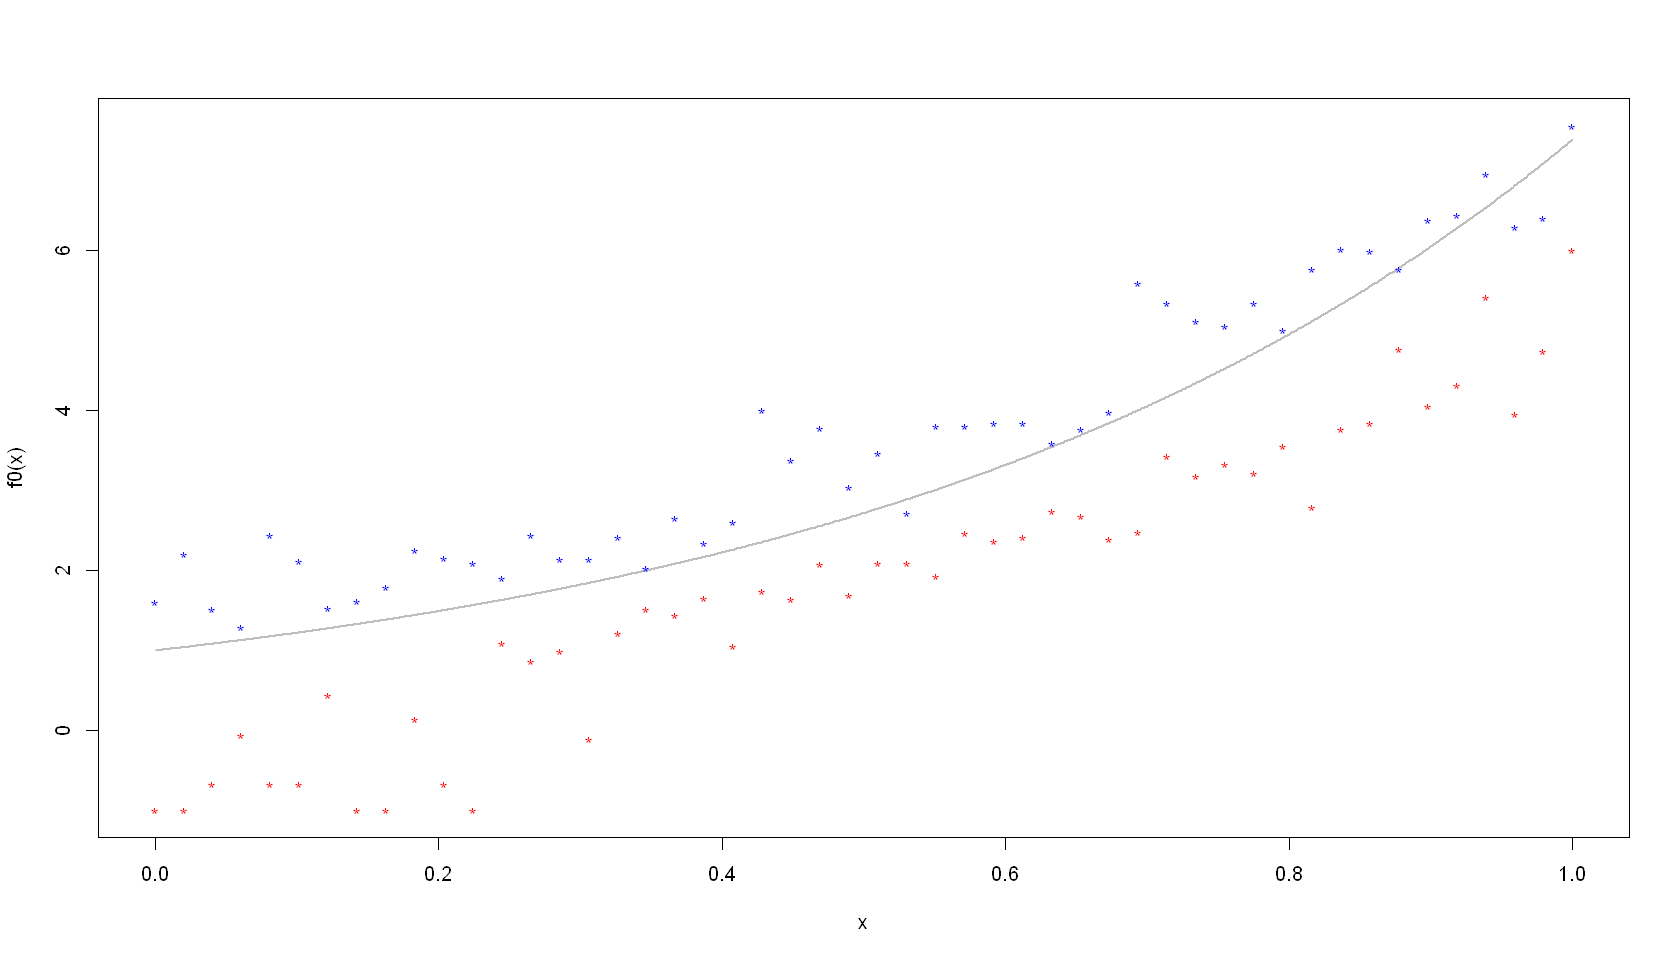

In [52]:
### HulC.R contains all the functions to the HulC procedure.
source("HulC.R")

### loading necessary packages plotting.
# library("ggplot2")
library("repr")

## One replication
set.seed(100)
alpha <- 0.05
x_grid <- seq(0, 1, length = 50)
x_seq <- sort(runif(100))
f0 <- function(x){ exp(2*x) }
y_seq <- f0(x_seq) + rnorm(100)
estimate <- function(dat){
  tmp <- isoreg(dat[,1], dat[,2])
  approx(sort(tmp$x), tmp$yf, xout = x_grid, method="constant", rule = 2)$y
}
## We take alpha to be 0.05*length(x_grid) so that the confidence intervals
## constructed are non-simultaneous. This means that the coverage at each
## point is supposed to be 0.05 individually. The joint coverage is not
## controlled.
tmp <- HulC(cbind(x_seq, y_seq), estimate, alpha = alpha*length(x_grid), 
            Delta = 0, dim = length(x_grid))$CI

plot(seq(0, 1, len = 1000), f0(seq(0, 1, len = 1000)), type = 'l', col = "gray",
     ylim = c(min(tmp[,1],1), max(tmp[,2], exp(2))), xlab = "x", ylab = "f0(x)", lwd = 2)
points(x_grid, tmp[,1], col = "red", pch = "*")
points(x_grid, tmp[,2], col = "blue", pch = "*")

In [34]:
## Initiating matrices and vectors
## x_grid is the x^* values
x_grid <- seq(0.01, 0.99, length = 50)
## number of replications
nrep <- 1000
## different sample sizes
nsamp_seq <- c(100, 250)

final_grid <- expand.grid(x_grid, nsamp_seq, 1:nrep)
colnames(final_grid) <- c("x", "nsamp", "rep")
hulc_final_grid <- data.frame(ci_lwr = rep(0, nrow(final_grid)),
                             ci_upr = rep(0, nrow(final_grid)),
                             x = final_grid[,1],
                             nsamp = final_grid[,2],
                             rep = final_grid[,3])
head(hulc_final_grid)
nrow(final_grid)

ci_lwr,ci_upr,x,nsamp,rep
0,0,0.01,100,1
0,0,0.03,100,1
0,0,0.05,100,1
0,0,0.07,100,1
0,0,0.09,100,1
0,0,0.11,100,1


[1] 100000

In [35]:
## Setting seed for reproducibility
set.seed(2021)
alpha <- 0.05
f0 <- function(x){ exp(2*x) }
for(idx in 1:nrow(final_grid)){
    x_seq <- runif(final_grid[idx,2])
    y_seq <- f0(x_seq) + rnorm(final_grid[idx, 2])
    estimate <- function(dat){
        tmp <- isoreg(dat[,1], dat[,2])
        approx(sort(tmp$x), tmp$yf, xout = final_grid[idx,1], method="constant", rule = 2)$y
    }
    hulc_final_grid[idx, 1:2] <- HulC(cbind(x_seq, y_seq), estimate, alpha = alpha, Delta = 0)$CI
}
head(hulc_final_grid)

ci_lwr,ci_upr,x,nsamp,rep
-0.34958209,2.492481,0.01,100,1
-0.02722885,1.532066,0.03,100,1
-0.16469612,1.238716,0.05,100,1
-0.40233590,1.345532,0.07,100,1
-0.32384099,1.985438,0.09,100,1
0.31617701,1.656305,0.11,100,1


In [36]:
# save(hulc_final_grid, file = "hulc_monotone_zero_delta.RData")

## Plotting

In [37]:
width_mat <- data.frame(width = hulc_final_grid[,2] - hulc_final_grid[,1],
                       x = final_grid[,1],
                       nsamp = final_grid[,2],
                       rep = final_grid[,3])
grid_new <- expand.grid(x_grid, nsamp_seq)
colnames(grid_new) <- c("x", "nsamp")
col.cov <- data.frame(coverage = rep(0, nrow(grid_new)), x = grid_new$x, nsamp = grid_new$nsamp)
for(idx in 1:nrow(grid_new)){
    temp.cov <- hulc_final_grid[hulc_final_grid$x==grid_new[idx,"x"],]
    temp.cov1 <- temp.cov[temp.cov$nsamp==grid_new[idx,"nsamp"],]
    true_val <- f0(grid_new[idx,"x"])
    col.cov[idx,1] <- mean(sign(temp.cov1[,2] - true_val) + sign(true_val - temp.cov1[,1]) >= 1)
}
head(width_mat)
head(col.cov)

width,x,nsamp,rep
2.842063,0.01,100,1
1.559295,0.03,100,1
1.403412,0.05,100,1
1.747868,0.07,100,1
2.309279,0.09,100,1
1.340128,0.11,100,1


coverage,x,nsamp
0.913,0.01,100
0.891,0.03,100
0.892,0.05,100
0.901,0.07,100
0.910,0.09,100
0.924,0.11,100


### Coverage plots

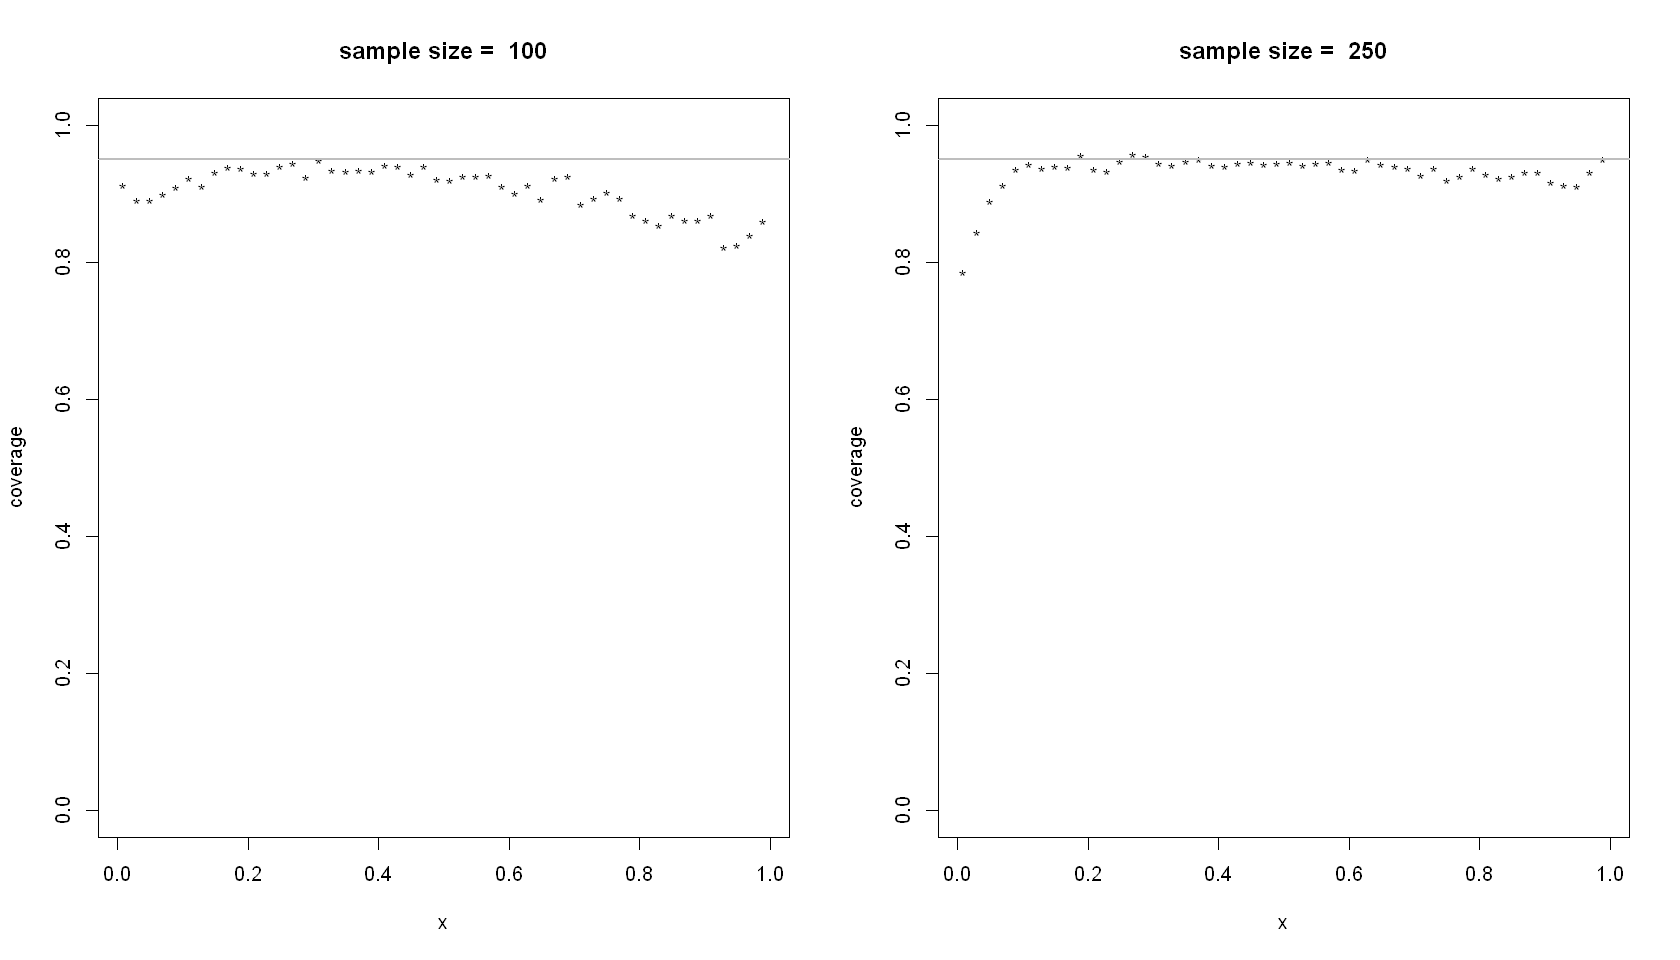

In [38]:
## coverage plot
options(repr.plot.width=14, repr.plot.height=8)    
par(mfrow = c(1, 2))
plot(x_grid, col.cov[col.cov$nsamp == nsamp_seq[1],1], ylim = c(0, 1), ylab = "coverage", xlab = "x", pch = "*")
abline(h = 0.95, col = "gray", lwd = 2)
title(paste("sample size = ", nsamp_seq[1]))
plot(x_grid, col.cov[col.cov$nsamp == nsamp_seq[2],1], ylim = c(0, 1), ylab = "coverage", xlab = "x", pch = "*")
abline(h = 0.95, col = "gray", lwd = 2)
title(paste("sample size = ", nsamp_seq[2]))

### Width plot

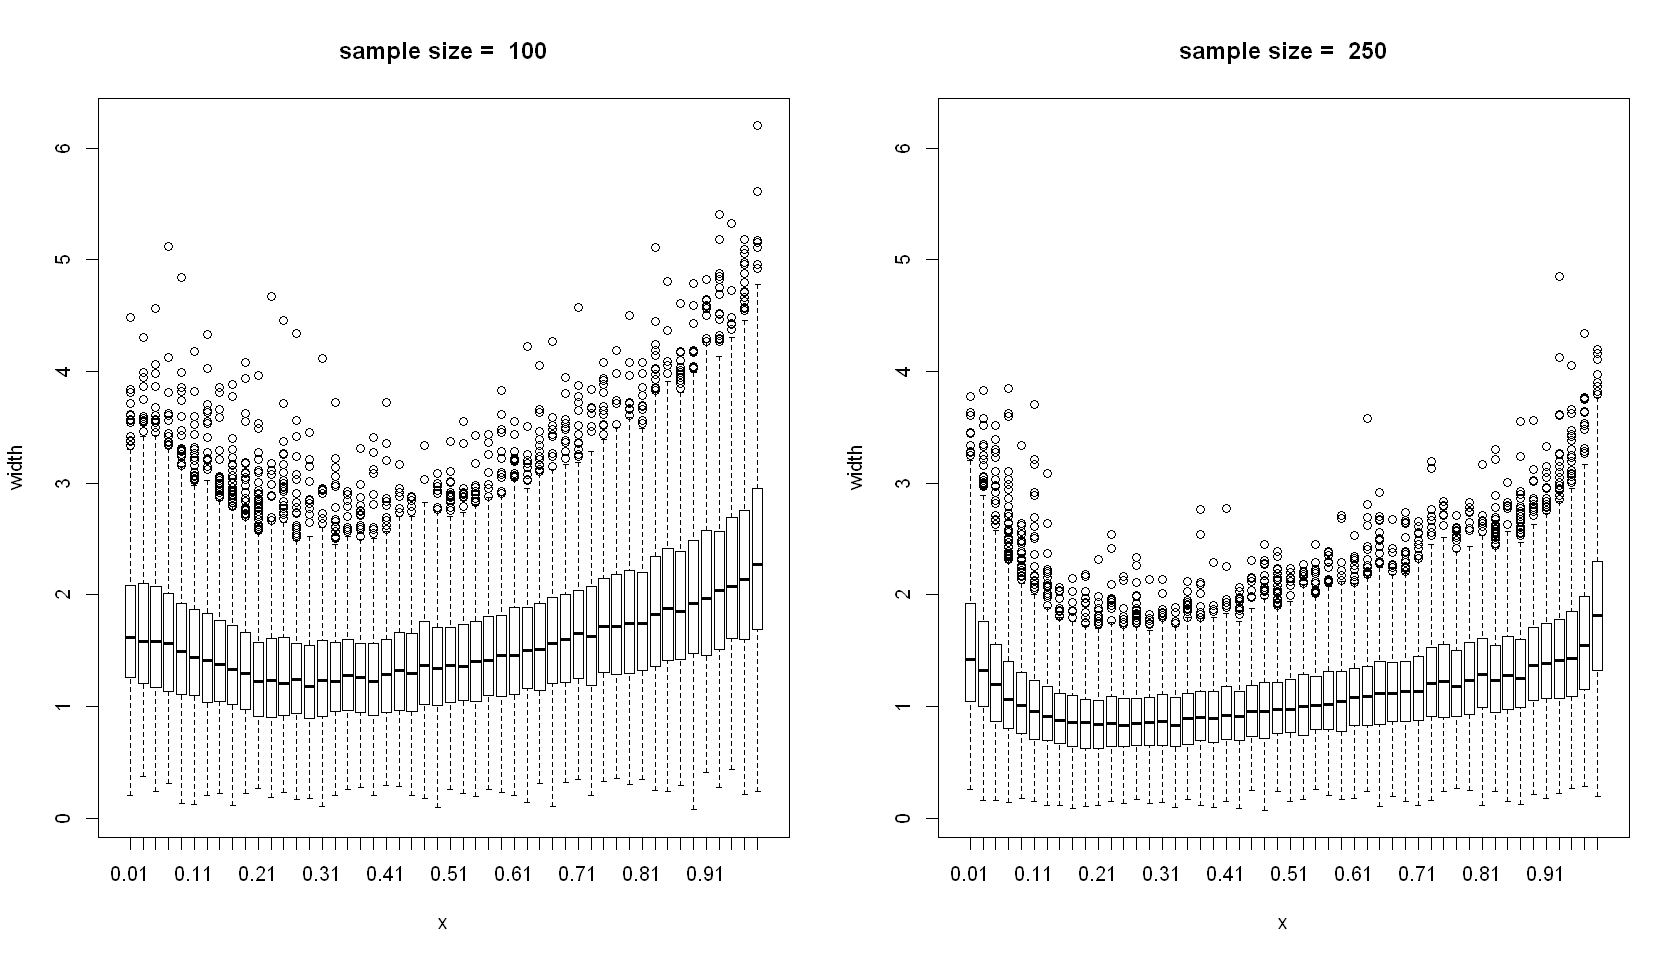

In [51]:
par(mfrow = c(1,2))
width_mat_by_x <- vector("list", 2)
for(jdx in 1:length(nsamp_seq)){
    nsamp <- nsamp_seq[jdx]
    width_mat_by_x[[jdx]] <- matrix(0, nrow = nrep, ncol = length(x_grid))
    colnames(width_mat_by_x[[jdx]]) <- paste(x_grid)
    for(idx in 1:length(x_grid)){
        width_mat_by_x[[jdx]][,idx] <- width_mat[width_mat$nsamp == nsamp & width_mat$x == x_grid[idx], 1]
    }
}
ran <- c(min(min(width_mat_by_x[[1]]), min(width_mat_by_x[[2]])), max(max(width_mat_by_x[[1]]), max(width_mat_by_x[[2]])))
boxplot(width_mat_by_x[[1]], xlab = "x", ylab = "width", ylim = ran)
title(paste("sample size = ", nsamp_seq[1]))
boxplot(width_mat_by_x[[2]], xlab = "x", ylab = "width", ylim = ran)
title(paste("sample size = ", nsamp_seq[2]))